In [1]:
from pathlib import Path
import echopype as ep

In [2]:
import matplotlib.pyplot as plt

In [3]:
ed = ep.open_raw(
    "/Users/wu-jung/code_git/echopype/echopype/test_data/ek60/Winter2017-D20170115-T150122.raw",
    sonar_model="EK60"
)

23:13:57  parsing file Winter2017-D20170115-T150122.raw, time of first ping: 2017-Jan-15 15:01:22


In [4]:
ds = ep.calibrate.compute_Sv(ed)

In [5]:
ds_new = ep.utils.common.add_location(ds=ds, echodata=ed, nmea_sentence="GGA")

In [6]:
ds

<xarray.Dataset>
Dimensions:                (channel: 3, ping_time: 437, range_sample: 7915,
                            filenames: 1, time3: 437)
Coordinates:
  * channel                (channel) <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-...
  * ping_time              (ping_time) datetime64[ns] 2017-01-15T15:01:22.905...
  * range_sample           (range_sample) int64 0 1 2 3 ... 7911 7912 7913 7914
  * time3                  (time3) datetime64[ns] 2017-01-15T15:01:22.9059998...
Dimensions without coordinates: filenames
Data variables:
    Sv                     (channel, ping_time, range_sample) float64 -0.0043...
    echo_range             (channel, ping_time, range_sample) float64 0.0 ......
    frequency_nominal      (channel) float64 1.8e+04 3.8e+04 1.2e+05
    sound_speed            (channel, ping_time) float64 1.481e+03 ... 1.481e+03
    sound_absorption       (channel, ping_time) float64 0.002822 ... 0.03259
    sa_correction          (ping_time, channel) float64 -0.83 -0.55 ... -0.34
    gain_correction        (ping_time, channel) float64 23.35 26.51 ... 26.62
    equivalent_beam_angle  (channel, ping_time) float64 -17.37 -17.37 ... -20.47
    source_filenames       (filenames) <U89 '/Users/wu-jung/code_git/echopype...
    water_level            (channel, time3) float64 dask.array<chunksize=(3, 437), meta=np.ndarray>
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.6.0
    processing_time:              2022-07-01T06:14:00Z
    processing_function:          calibrate.compute_Sv

In [7]:
ds_new

<xarray.Dataset>
Dimensions:                (channel: 3, ping_time: 437, range_sample: 7915,
                            filenames: 1, time3: 437)
Coordinates:
  * channel                (channel) <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-...
  * ping_time              (ping_time) datetime64[ns] 2017-01-15T15:01:22.905...
  * range_sample           (range_sample) int64 0 1 2 3 ... 7911 7912 7913 7914
  * time3                  (time3) datetime64[ns] 2017-01-15T15:01:22.9059998...
Dimensions without coordinates: filenames
Data variables:
    Sv                     (channel, ping_time, range_sample) float64 -0.0043...
    echo_range             (channel, ping_time, range_sample) float64 0.0 ......
    frequency_nominal      (channel) float64 1.8e+04 3.8e+04 1.2e+05
    sound_speed            (channel, ping_time) float64 1.481e+03 ... 1.481e+03
    sound_absorption       (channel, ping_time) float64 0.002822 ... 0.03259
    sa_correction          (ping_time, channel) float64 -0.83 -0.55 ... -0.34
    gain_correction        (ping_time, channel) float64 23.35 26.51 ... 26.62
    equivalent_beam_angle  (channel, ping_time) float64 -17.37 -17.37 ... -20.47
    source_filenames       (filenames) <U89 '/Users/wu-jung/code_git/echopype...
    water_level            (channel, time3) float64 dask.array<chunksize=(3, 437), meta=np.ndarray>
    latitude               (ping_time) float64 dask.array<chunksize=(437,), meta=np.ndarray>
    longitude              (ping_time) float64 dask.array<chunksize=(437,), meta=np.ndarray>
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.6.0
    processing_time:              2022-07-01T06:14:00Z
    processing_function:          calibrate.compute_Sv

In [7]:
ds_new2 = ep.utils.common.add_location(ds=ds, echodata=ed)

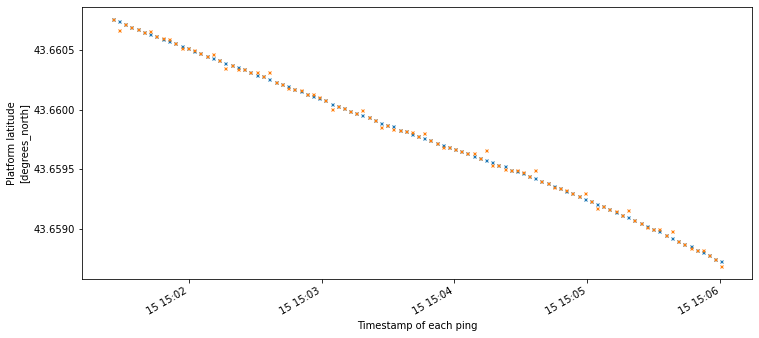

In [9]:
plt.figure(figsize=(12,5))
ds_new["latitude"].isel(ping_time=slice(None, 100)).plot(ls="none", marker="x", markersize=3)
ds_new2["latitude"].isel(ping_time=slice(None, 100)).plot(ls="none", marker="x", markersize=3)

In [10]:
import datetime

In [11]:
history = (
        f"{datetime.datetime.utcnow()} +00:00. "
        "Interpolated from Platform latitude/longitude."
    )

In [12]:
history

'2022-07-01 06:07:54.114757 +00:00. Interpolated from Platform latitude/longitude.'

In [18]:
ds_new["latitude"] = ds_new["latitude"].assign_attrs({"history": history})

In [19]:
ds_new["latitude"]

<xarray.DataArray 'latitude' (ping_time: 437)>
dask.array<dask_aware_interpnd, shape=(437,), dtype=float64, chunksize=(437,), chunktype=numpy.ndarray>
Coordinates:
  * ping_time  (ping_time) datetime64[ns] 2017-01-15T15:01:22.905999872 ... 2...
Attributes:
    long_name:      Platform latitude
    standard_name:  latitude
    units:          degrees_north
    valid_range:    (-90.0, 90.0)
    history:        2022-07-01 06:07:54.114757 +00:00. Interpolated from Plat...

In [17]:
import matplotlib.pyplot as plt

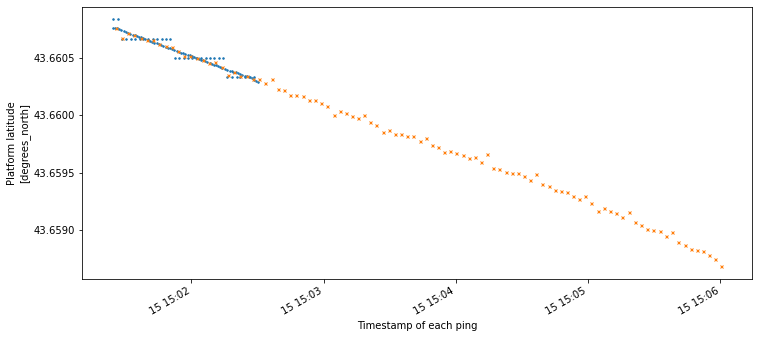

In [32]:
plt.figure(figsize=(12,5))
ed["Platform"]["latitude"].isel(time1=slice(None, 100)).plot(ls="none", marker=".", markersize=3)
ds["latitude"].isel(ping_time=slice(None, 100)).plot(ls="none", marker="x", markersize=3)

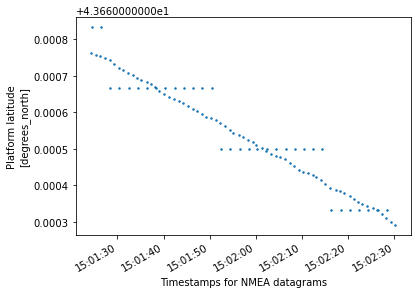

In [33]:
ed["Platform"]["latitude"].isel(time1=slice(None, 100)).plot(ls="none", marker=".", markersize=3)

In [37]:
import numpy as np

In [38]:
np.unique(ed["Platform"]["sentence_type"])

array(['GGA', 'GLL'], dtype='<U3')

In [39]:
ed["Platform"]["sentence_type"]=="GLL"

<xarray.DataArray 'sentence_type' (time1: 2004)>
dask.array<eq, shape=(2004,), dtype=bool, chunksize=(2004,), chunktype=numpy.ndarray>
Coordinates:
  * time1    (time1) datetime64[ns] 2017-01-15T15:01:24.287000064 ... 2017-01...

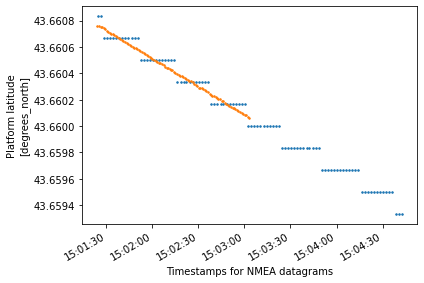

In [45]:
ed["Platform"]["latitude"][ed["Platform"]["sentence_type"]=="GLL"].isel(time1=slice(None, 100)).plot(
    ls="none", marker=".", markersize=3
)
ed["Platform"]["latitude"][ed["Platform"]["sentence_type"]=="GGA"].isel(time1=slice(None, 100)).plot(
    ls="none", marker=".", markersize=3
)

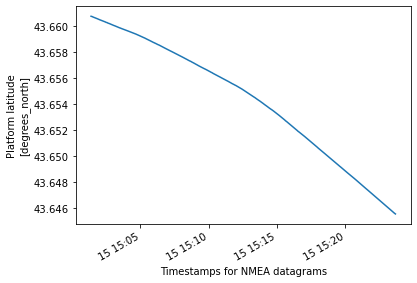

In [42]:
ed["Platform"]["latitude"][ed["Platform"]["sentence_type"]=="GGA"].plot()

In [34]:
ed["Platform"]

<xarray.Dataset>
Dimensions:              (time1: 2004, channel: 3, time2: 437, time3: 437)
Coordinates:
  * time1                (time1) datetime64[ns] 2017-01-15T15:01:24.287000064...
  * channel              (channel) <U37 'GPT  18 kHz 009072058c8d 1-1 ES18-11...
  * time2                (time2) datetime64[ns] 2017-01-15T15:01:22.905999872...
  * time3                (time3) datetime64[ns] 2017-01-15T15:01:22.905999872...
Data variables: (12/20)
    latitude             (time1) float64 dask.array<chunksize=(2004,), meta=np.ndarray>
    longitude            (time1) float64 dask.array<chunksize=(2004,), meta=np.ndarray>
    sentence_type        (time1) <U3 dask.array<chunksize=(2004,), meta=np.ndarray>
    pitch                (channel, time2) float64 dask.array<chunksize=(3, 437), meta=np.ndarray>
    roll                 (channel, time2) float64 dask.array<chunksize=(3, 437), meta=np.ndarray>
    vertical_offset      (channel, time2) float64 dask.array<chunksize=(3, 437), meta=np.ndarray>
    ...                   ...
    MRU_rotation_y       (channel) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    MRU_rotation_z       (channel) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    position_offset_x    (channel) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    position_offset_y    (channel) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    position_offset_z    (channel) float64 dask.array<chunksize=(3,), meta=np.ndarray>
    frequency_nominal    (channel) float64 dask.array<chunksize=(3,), meta=np.ndarray>

In [46]:
ed_azfp = ep.open_raw(
    raw_file="/Users/wu-jung/code_git/echopype/echopype/test_data/azfp/17031001.01A",
    sonar_model="azfp",
    xml_path="/Users/wu-jung/code_git/echopype/echopype/test_data/azfp/17030815.XML"
)

22:25:43  parsing file 17031001.01A with 17030815.XML, time of first ping: 2017-Mar-10 01:00:00


In [47]:
ed_azfp["Platform"]

<xarray.Dataset>
Dimensions:              (time2: 360)
Coordinates:
  * time2                (time2) datetime64[ns] 2017-03-10T01:00:00 ... 2017-...
Data variables: (12/16)
    tilt_x               (time2) float64 0.8577 0.8932 0.9321 ... 0.9534 0.9995
    tilt_y               (time2) float64 -2.174 -2.063 -2.018 ... -1.934 -2.035
    MRU_offset_x         float64 nan
    MRU_offset_y         float64 nan
    MRU_offset_z         float64 nan
    MRU_rotation_x       float64 nan
    ...                   ...
    position_offset_z    float64 nan
    transducer_offset_x  float64 nan
    transducer_offset_y  float64 nan
    transducer_offset_z  float64 nan
    vertical_offset      float64 nan
    water_level          float64 nan
Attributes:
    platform_name:       
    platform_type:       
    platform_code_ICES: